In [6]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = os.path.join(DOWNLOAD_ROOT, HOUSING_PATH, "housing.tgz")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [7]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
#housing.head()
#housing.info()
housing["ocean_proximity"].value_counts()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


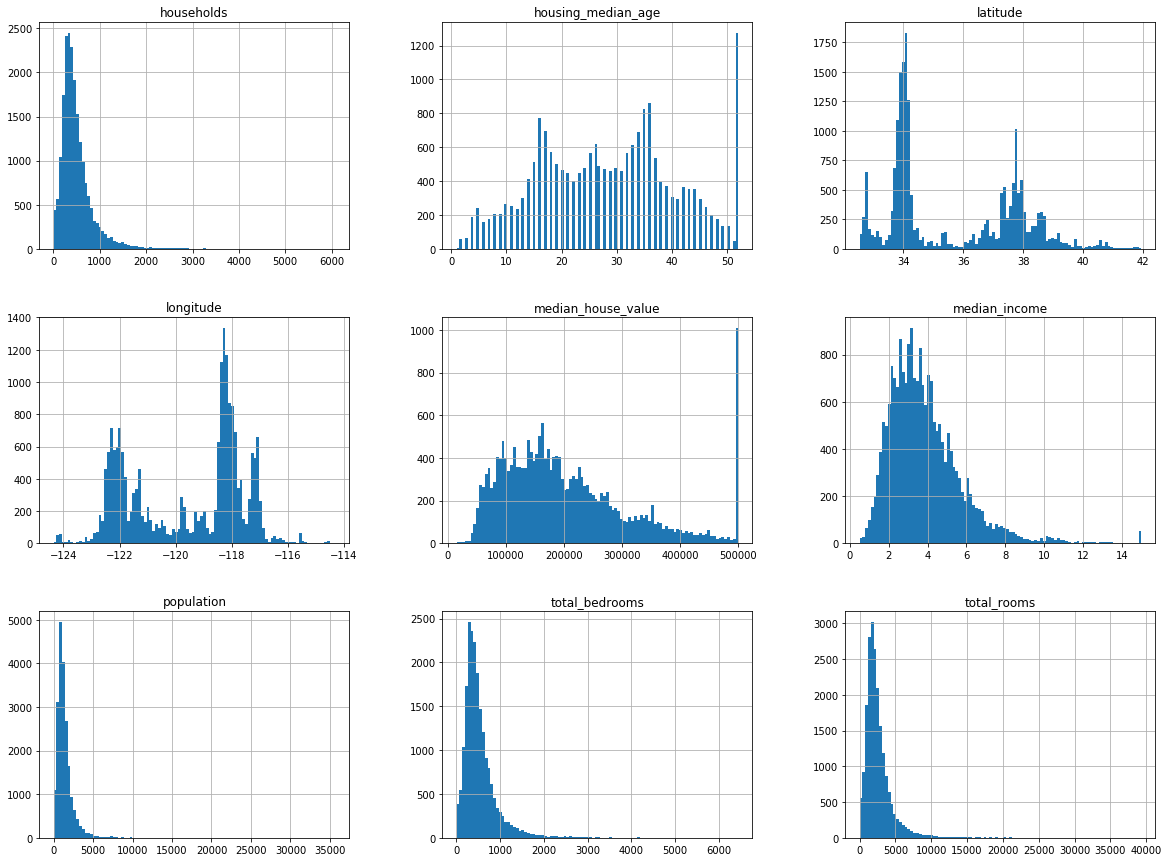

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=100, figsize=(20, 15))
plt.show()

In [29]:
import numpy as np
#the split is unstable
def split_train_test(data, test_ratio):
    shuffle_idx = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_idx = shuffle_idx[:test_set_size]
    train_idx = shuffle_idx[test_set_size:]
    return data.iloc[train_idx], data.iloc[test_idx]

a, b = split_train_test(housing, 0.4)
a.head(2)
b.head(2)
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  See Also
 |  --------
 |  column_stack : Stack 1-D arrays as columns into a 2-D array.
 |  r_ : For more detailed documentation.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
 |  array([[1, 4],
 |         [2, 5],
 |         [3, 6]])
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |    